In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")


In [4]:

from google.colab import files
uploaded = files.upload()


cust_df = pd.read_csv("Mall_Customers.csv")
cust_df.head()


Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:

print(cust_df.shape)
print(cust_df.info())
print(cust_df.describe())


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.0

In [6]:

cust_df = cust_df.drop(columns=["CustomerID"])

cust_df = pd.get_dummies(cust_df, drop_first=True)


scaler = StandardScaler()
scaled = scaler.fit_transform(cust_df)

print("after scaling:", scaled.shape)


after scaling: (200, 4)


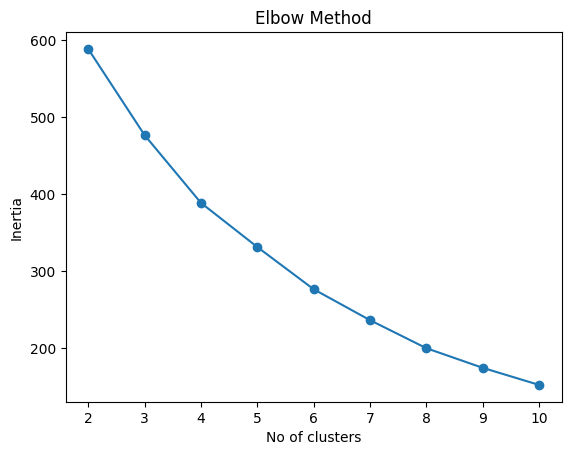

In [7]:

inertia = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


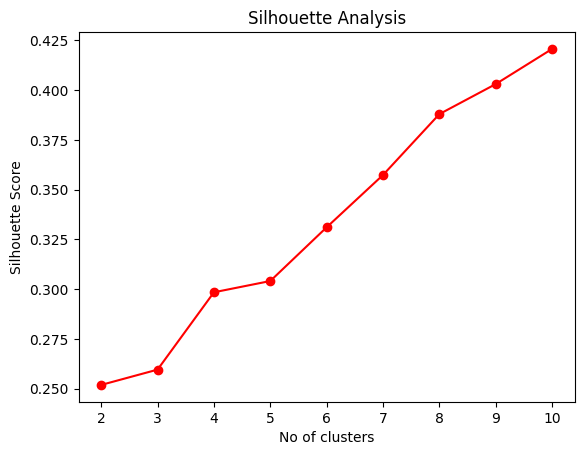

In [8]:

scores = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(scaled)
    scores.append(silhouette_score(scaled, labels))

plt.plot(K, scores, marker="o", color="red")
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


In [9]:

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cust_df["Cluster"] = kmeans.fit_predict(scaled)

cust_df.head()


,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Cluster
0,19,15,39,True,3
1,21,15,81,True,3
2,20,16,6,False,3
3,23,16,77,False,3
4,31,17,40,False,3


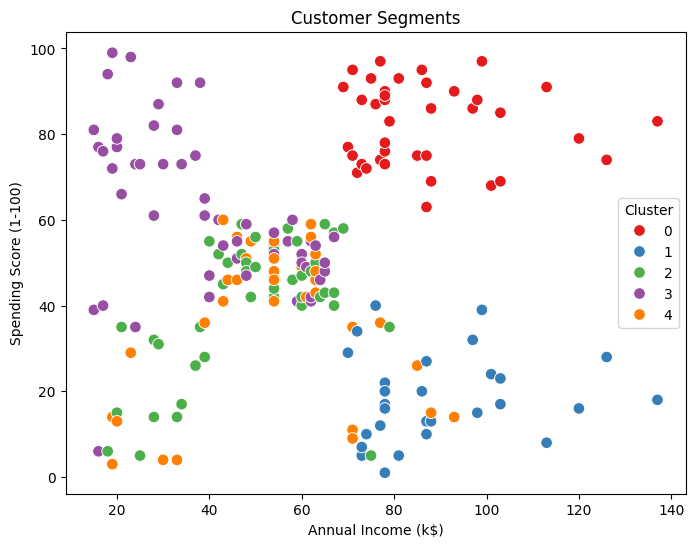

In [10]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=cust_df["Annual Income (k$)"],
                y=cust_df["Spending Score (1-100)"],
                hue=cust_df["Cluster"],
                palette="Set1", s=70)
plt.title("Customer Segments")
plt.show()


In [11]:

summary = cust_df.groupby("Cluster").mean()
print(summary)


               Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
Cluster                                                                   
0        32.692308           86.538462               82.128205    0.461538
1        36.482759           89.517241               18.000000    0.448276
2        49.813953           49.232558               40.069767    0.000000
3        24.907407           39.722222               61.203704    0.407407
4        55.714286           53.685714               36.771429    1.000000


In [13]:

print("Cluster 0 -> high income + high spending (premium)")
print("Cluster 1 -> high income + low spending (Cautious rich customers)")
print("Cluster 2 -> average income but low spending")
print("Cluster 3 -> younger customers low income, medium spending")
print("Cluster 4 -> older customers spending less")


Cluster 0 -> high income + high spending (premium)
Cluster 1 -> high income + low spending (budget customers)
Cluster 2 -> average income but low spending
Cluster 3 -> younger customers low income, medium spending
Cluster 4 -> older customers spending less
